In [404]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt


In [327]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):    
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [337]:
TrainingSet=[]
TestSet=[]
loadDataset('iris.data.txt', 0.7, TrainingSet, TestSet)
print ('Train: ' + repr(len(TrainingSet)))
print ('Test: ' + repr(len(TestSet)) )
TrainingSet
TestSet

Train: 101
Test: 49


[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
 [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
 [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
 [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'],
 [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
 [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
 [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
 [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
 [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'],
 [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'],
 [6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'],
 [5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'],
 [6.0, 2.2, 4.0, 1.0, 'Iris-versicolor'],
 [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'],
 [5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'],
 [5.6, 2.5, 3.9, 1.1, 'Iris-versicolor'],
 [6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'],
 [6.7, 3.0, 5.0, 1.7, 'Iris-versicolor'],
 [6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'],
 [5.6, 3.0, 4.

In [338]:
import math

def euclideanDistance(instance1, instance2, length):
    x1 = instance1[:length]
    x2 = instance2[:length]
    res = [(i[0]-i[1])**2 for i in zip(x1,x2)]
    return np.sqrt(sum(res))

In [339]:
data1 = [2, 2, 2,'a']
data2 = [4, 4, 4,'b']
distance = euclideanDistance(data1, data2, 3)
print('Euclidean distance: ' + repr(distance))

Euclidean distance: 3.4641016151377544


In [340]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [341]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [262]:
classVotes = {}
classVotes['neighbors'] = 1
classVotes['neighbors'] +=1
classVotes

{'neighbors': 2}

In [383]:
import operator

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1] #complete with appropriate number
        if response in classVotes:
            classVotes[response] = classVotes[response] + 1
        else:
            classVotes[response] =1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [361]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


In [344]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct+=1    
    return (correct/float(len(testSet))) * 100.0

In [345]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


# KNN  

In [388]:
def predict(testInstance,TrainingSet,K):
    neighbors = [getNeighbors(TrainingSet, i, K) for i in testInstance]
    return list(map(getResponse,neighbors))

In [411]:
acc_min = 100
K_opt = 0
scores=[]
for K in range(1,15):
    predictions = predict(TestSet,TrainingSet,K)
    accurancy = getAccuracy(TestSet, predictions)
    scores.append(accurancy)
    if accurancy < acc_min:
        acc_min = accurancy
        K_opt = K
    print('Accurancy is '+ repr(accurancy))
print('optimal K is '+ repr(K_opt))

Accurancy is 93.87755102040816
Accurancy is 93.87755102040816
Accurancy is 93.87755102040816
Accurancy is 93.87755102040816
Accurancy is 95.91836734693877
Accurancy is 93.87755102040816
Accurancy is 95.91836734693877
Accurancy is 93.87755102040816
Accurancy is 95.91836734693877
Accurancy is 95.91836734693877
Accurancy is 97.95918367346938
Accurancy is 97.95918367346938
Accurancy is 97.95918367346938
Accurancy is 95.91836734693877
optimal K is 1
[93.87755102040816, 93.87755102040816, 93.87755102040816, 93.87755102040816, 95.91836734693877, 93.87755102040816, 95.91836734693877, 93.87755102040816, 95.91836734693877, 95.91836734693877, 97.95918367346938, 97.95918367346938, 97.95918367346938, 95.91836734693877]


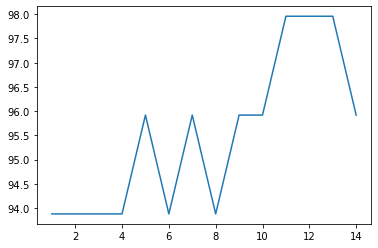

In [412]:
plt.plot([K for K in range(1,15)],scores)

SyntaxError: illegal target for annotation (<ipython-input-399-34792ee9144a>, line 1)